# Lab 4 - Regularized Least Squares

This lab is about employing Regularized Least Squares (RLS) to address regression problems.

In [140]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import scipy.linalg
import os

##### Copy here below the code of the function to generate synthetic datasets for linear regression problems

In [1]:
def linearRegrFunction(n, D, low_D, high_D, W, sigma_noise):
   
    X = np.zeros((n,D))
    for i in range(0, D):
        X[:,i] = np.random.uniform(low_D[i], high_D[i], size=n)
    
    gauss_noise = np.random.normal(0, sigma_noise, size=(n,1))

    Y = np.dot(X, W) + gauss_noise
    
    return X, Y

##### Write a function for training a RLS regression using the Cholesky decomposition

In [136]:
def regularizedLSTrain(Xtr, Ytr, reg_par):
    
    ... fill here ...

##### Given two vectors — Ytrue (real outputs) and Ypred (predicted outputs) — you need a function to estimate the error when predicting Yp instead of Y. To this purpose you can use the MSE (Mean Square Error): 

In [97]:
def calcError(Ypred, Ytrue):
    return np.mean((Ypred-Ytrue)**2)

##### Write a function to evaluate a function estimated with RLS

In [137]:
def regularizedLSTest(w, Xtest):
   
    ... fill here ...

##### Generate a training set of n D-dimensional points 

In [141]:
n = ...
D = ...
sigma_noise = ...
truew = ...

low_D = ...
high_D = ...

Xtr, Ytr = ...

(10000, 1000)
(10000, 1)


##### Pick a reasonable value for the regularization parameter and train the RLS on the training set
##### HINT: have a look at the computed matrix, to verify that IT IS symmetric and IF it is invertible (recalling that it is invertible when it has full rank...)

In [142]:
reg_par = ...

estw = regularizedLSTrain(... 

##### Build a test set, with similar properties to the training set, and evaluate on it the trained model. Also, evaluate the error on the training set, then print both to have a look at their values

In [144]:
Xte, Yte = linearRegrFunction(...

test_err = regularizedLSTest(...
train_err = regularizedLSTest(...
                              
print("MSE on the test set "+str(test_err)) 
print("MSE on the training set "+str(train_err))

##### Build and plot the training and test error curves by repeiting the procedure above on different values of the regularization parameter

In [138]:
reg_pars = ...
errs_tr = np.zeros(np.shape(reg_pars))
errs_te = np.zeros(np.shape(reg_pars))

for i in range(len(reg_pars)):

    w = regularizedLSTrain(...
    
    Ypred_tr = ...
    Ypred_te = ...
    
    errs_tr[i] = calcError(Ypred_tr, Ytr)
    errs_te[i] = calcError(Ypred_te, Yte)

plt.plot(reg_pars, errs_te, '-o')
plt.plot(reg_pars, errs_tr, '-o')
plt.xlabel("Regularization parameter")
plt.ylabel("MSE")

##### Have a look at the following function, to perform K-Fold Cross Validation when training a RLS 

In [111]:
def KFoldCVRLS(Xtr, Ytr, KF, regpar_list):

    if KF <= 0:
        print("Please supply a positive number of repetitions")
        return -1

    # Ensures that k_list is a numpy array
    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]
    n_val = int(np.ceil(n_tot/KF))

    Tm = np.zeros(num_regpar)
    Ts = np.zeros(num_regpar)
    Vm = np.zeros(num_regpar)
    Vs = np.zeros(num_regpar)

    # Random permutation of training data
    rand_idx = np.random.choice(n_tot, size=n_tot, replace=False)
    
    
    for kdx, regpar in enumerate(regpar_list):
        first = 0
        for fold in range(KF):
           
            flags = np.zeros(Xtr.shape[0])
            flags[first:first+n_val]=1;
            
            X = Xtr[rand_idx[flags==0]]
            Y = Ytr[rand_idx[flags==0]]
            X_val = Xtr[rand_idx[flags==1]]
            Y_val = Ytr[rand_idx[flags==1]]

            # Compute the training error of the RLS regression for the given value of regpar
            currW = regularizedLSTrain(X, Y, regpar)
            YpredTR = regularizedLSTest(currW, X)
            trError = calcError(YpredTR, Y)
            Tm[kdx] = Tm[kdx] + trError
            Ts[kdx] = Ts[kdx] + trError ** 2

            # Compute the validation error of the RLS regression for the given value of regpar
            YpredVAL = regularizedLSTest(currW, X_val)
            valError = calcError(YpredVAL, Y_val)
            Vm[kdx] = Vm[kdx] + valError
            Vs[kdx] = Vs[kdx] + valError ** 2
            
            first = first+n_val                

    Tm = Tm / KF
    Ts = Ts / KF - Tm ** 2

    Vm = Vm / KF
    Vs = Vs / KF - Vm ** 2

    best_regpar_idx = np.argmin(Vm)
    bestregpar = regpar_list[best_regpar_idx]

    return bestregpar, Vm, Vs, Tm, Ts

##### Given the same array of possible values for the regularization parameter, select the best value with K-Fold Cross Validation, then train the model with the selected value and have a look to the test error

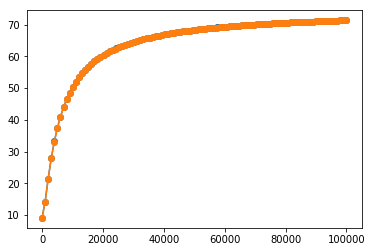

In [112]:
reg_pars = ...
KF = ...
bestregpar, Vm, Vs, Tm, Ts = KFoldCVRLS(Xtr, Ytr, 5, reg_pars)

plt.plot(reg_pars, Vm, '-o')
plt.plot(reg_pars, Tm, '-o')
plt.xlabel("Regularization parameter")
plt.ylabel("MSE")

##### Repeat the procedure above on a different dataset, sampled in a range non symmetric wrt the original, e.g. [2 5]
##### What changes? Reason on the further steps that you need to 